# Домашняя работа к лекции «Визуализация данных»

### Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

 - данные приложений из Google Play;
 - данные о видео из трендов YouTube;
 - данные об уровне счастья в разных странах.
 
### Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [36]:
import seaborn as sns

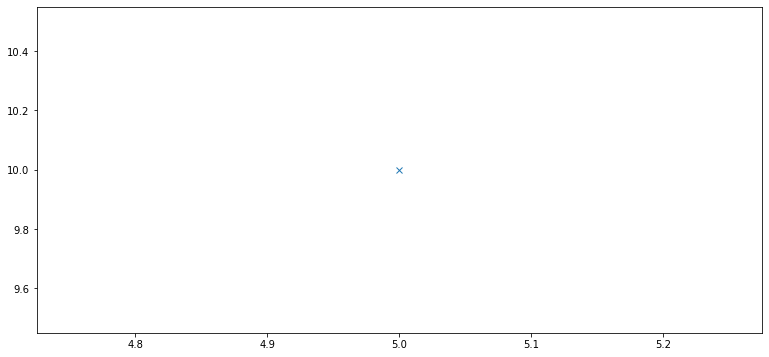

In [64]:
plt.plot(5, 10, 'x')

#### Данные о продаже поддержанных автомобилей в США с сайта auctionexport.com

In [38]:
df = pd.read_csv('USA_cars_datasets.csv')
USA_cars = df[['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'state', 'country']]
USA_cars

,price,brand,model,year,title_status,mileage,color,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa
...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa


In [39]:
USA_cars.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [40]:
USA_cars.price.sum()

46900411

In [41]:
def old_age_status(year):
    if year > 2015:
        return 'young'
    elif year > 2010:
        return 'middle-aged'
    else:
        return 'old'    
USA_cars['old_age_status'] = USA_cars['year'].apply(old_age_status)

def mileage_status(mileage):
    if mileage < 50000:
        return 'low_mileage'
    elif mileage < 150000:
        return 'avarage_mileage'
    else:
        return 'high_mileage'    
USA_cars['mileage_status'] = USA_cars['mileage'].apply(mileage_status)

USA_cars

<ipython-input-41-9b0e88e22189>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_cars['old_age_status'] = USA_cars['year'].apply(old_age_status)
<ipython-input-41-9b0e88e22189>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_cars['mileage_status'] = USA_cars['mileage'].apply(mileage_status)


,price,brand,model,year,title_status,mileage,color,state,country,old_age_status,mileage_status
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,new jersey,usa,old,high_mileage
1,2899,ford,se,2011,clean vehicle,190552.0,silver,tennessee,usa,middle-aged,high_mileage
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,georgia,usa,young,low_mileage
3,25000,ford,door,2014,clean vehicle,64146.0,blue,virginia,usa,middle-aged,avarage_mileage
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,florida,usa,young,low_mileage
...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,california,usa,young,low_mileage
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,florida,usa,young,low_mileage
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,florida,usa,young,low_mileage
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,florida,usa,young,low_mileage


In [42]:
USA_cars_1 = USA_cars[[x for x in USA_cars.columns if 'price' in x] + ['year']] \
    .groupby('year').sum()
USA_cars_1

,price
year,
1973,29800
1984,25
1993,0
1994,25
1995,0
1996,0
1997,0
1998,25
1999,25


Text(0, 0.5, 'Продажи, млн. USD')

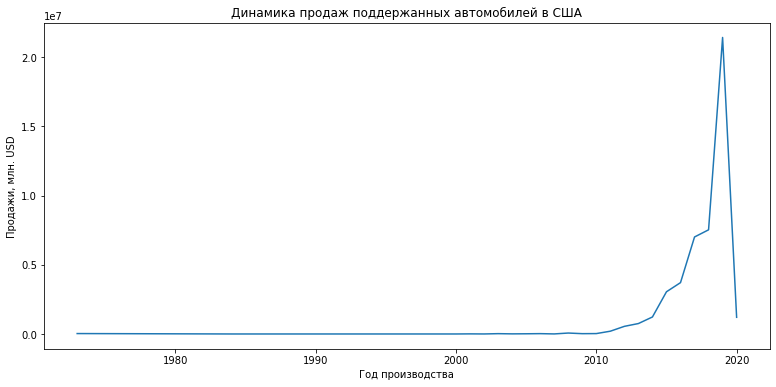

In [43]:
plt.plot(USA_cars_1.index, USA_cars_1.price)
plt.title('Динамика продаж поддержанных автомобилей в США')
plt.xlabel('Год производства')
plt.ylabel('Продажи, млн. USD')

In [44]:
USA_cars_2 = USA_cars[[x for x in USA_cars.columns if 'price' in x] + ['mileage']] \
    .groupby('mileage').sum()
USA_cars_2

,price
mileage,
0.0,4950
1.0,82105
7.0,25200
71.0,59975
122.0,26500
...,...
507985.0,2000
902041.0,475
982486.0,0


Text(0, 0.5, 'Продажи, млн. USD')

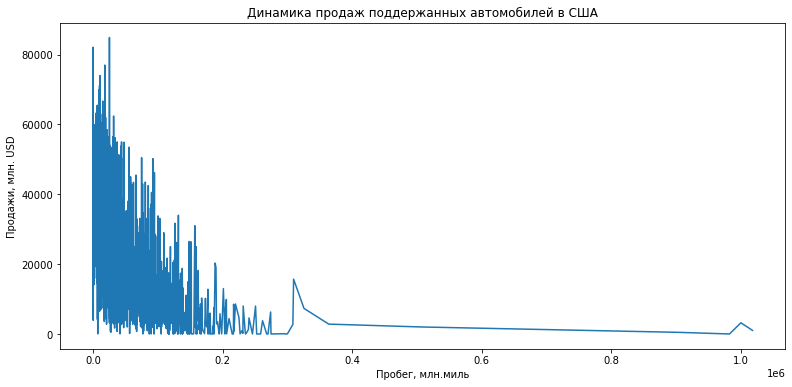

In [47]:
plt.plot(USA_cars_2.index, USA_cars_2.price)
plt.title('Динамика продаж поддержанных автомобилей в США')
plt.xlabel('Пробег, млн.миль')
plt.ylabel('Продажи, млн. USD')